# **Import Libraries**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from imblearn.over_sampling import SMOTE

# **Load Data**

In [2]:
df = pd.read_csv("loan_data.csv")

In [3]:
df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,credit_card,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.0,0,0
1,1,home_improvement,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.0,0,0
2,1,credit_card,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.0,0,0
3,1,credit_card,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.0,0,0
4,1,debt_consolidation,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.0,0,1


In [4]:
df["purpose"].value_counts()

purpose
debt_consolidation    19595
credit_card            9113
home_improvement       2847
other                  2508
major_purchase          905
medical                 466
house                   410
car                     385
vacation                314
small_business          272
moving                  236
renewable_energy         15
Name: count, dtype: int64

# **EDA**

### **Deal with NULL VALUES**

In [5]:
df.dropna(inplace=True)

In [6]:
df

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,credit_card,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.000,0,0
1,1,home_improvement,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.000,0,0
2,1,credit_card,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.000,0,0
3,1,credit_card,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.000,0,0
4,1,debt_consolidation,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37061,1,debt_consolidation,0.088,792.79,167000.0,24.66,694,37895,0,0.000,25987,0.680,0,1
37062,1,debt_consolidation,0.103,856.40,125000.0,11.73,744,31444,0,0.000,1728,0.033,0,1
37063,1,small_business,0.180,837.45,75000.0,9.02,694,40878,3,0.000,636,0.038,0,1
37064,1,debt_consolidation,0.110,458.48,32072.0,58.12,779,39539,0,0.000,15016,0.289,0,1


### **Dependent and Independent Data**

In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
X

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
0,1,credit_card,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.000,0
1,1,home_improvement,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.000,0
2,1,credit_card,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.000,0
3,1,credit_card,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.000,0
4,1,debt_consolidation,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37061,1,debt_consolidation,0.088,792.79,167000.0,24.66,694,37895,0,0.000,25987,0.680,0
37062,1,debt_consolidation,0.103,856.40,125000.0,11.73,744,31444,0,0.000,1728,0.033,0
37063,1,small_business,0.180,837.45,75000.0,9.02,694,40878,3,0.000,636,0.038,0
37064,1,debt_consolidation,0.110,458.48,32072.0,58.12,779,39539,0,0.000,15016,0.289,0


In [11]:
y

0        0
1        0
2        0
3        0
4        1
        ..
37061    1
37062    1
37063    1
37064    1
37065    1
Name: not_fully_paid, Length: 36920, dtype: int64

### **Encoding Categorical Data**

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1])], remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [13]:
print(X)

[[0.0000e+00 1.0000e+00 0.0000e+00 ... 3.0000e+00 5.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 2.0000e+00 1.0000e+00 0.0000e+00]
 [0.0000e+00 1.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 6.3600e+02 3.8000e-02 0.0000e+00]
 [0.0000e+00 0.0000e+00 1.0000e+00 ... 1.5016e+04 2.8900e-01 0.0000e+00]
 [0.0000e+00 0.0000e+00 1.0000e+00 ... 5.4530e+03 6.8200e-01 0.0000e+00]]


### **Splitting Dataset**

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Feature Scaling**

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,12:] = sc.fit_transform(X_train[:,12:])
X_test[:,12:] = sc.transform(X_test[:,12:])

In [16]:
print(X_train)

[[ 0.          0.          1.         ...  0.00683163  0.9288942
   2.69544863]
 [ 0.          0.          0.         ... -0.0207511   0.67376503
  -0.35672016]
 [ 0.          0.          1.         ... -0.17871582  0.74961424
  -0.35672016]
 ...
 [ 0.          0.          1.         ... -0.49284966 -0.08932403
  -0.35672016]
 [ 0.          0.          1.         ... -0.58258081 -0.84092079
  -0.35672016]
 [ 0.          0.          0.         ... -0.55340198 -0.74668389
   2.69544863]]


In [17]:
print(X_test)

[[ 0.          0.          1.         ...  0.70258471 -0.01347482
  -0.35672016]
 [ 0.          0.          0.         ... -0.0334202  -0.11920403
  -0.35672016]
 [ 0.          0.          1.         ...  0.00872701  0.68066041
  -0.35672016]
 ...
 [ 0.          1.          0.         ...  0.69729761 -0.28929014
  -0.35672016]
 [ 0.          0.          1.         ... -0.58253093 -0.84092079
  -0.35672016]
 [ 0.          0.          0.         ...  1.66533659  1.10357724
  -0.35672016]]


# **Modelling**

### **Train 01: Upsampling with SMOTE + Train model with Logistic Regression**

In [21]:
# Before upsampling
y_train.value_counts()

not_fully_paid
1    21484
0     8052
Name: count, dtype: int64

In [22]:
# Upsampling with SMOTE
sm = SMOTE(k_neighbors=5)
X_train_sample, y_train_sample = sm.fit_resample(X_train,y_train)

In [23]:
# After upsampling
y_train_sample.value_counts()

not_fully_paid
1    21484
0    21484
Name: count, dtype: int64

              precision    recall  f1-score   support

           0       0.71      0.66      0.69      2093
           1       0.87      0.90      0.88      5291

    accuracy                           0.83      7384
   macro avg       0.79      0.78      0.78      7384
weighted avg       0.82      0.83      0.83      7384



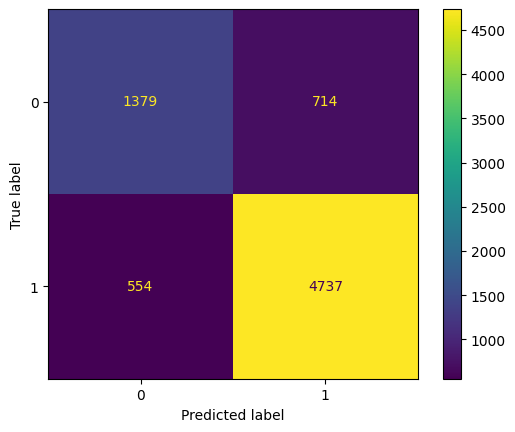

In [24]:
# Import libraries
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Train model
model_log = LogisticRegression()
model_log.fit(X_train_sample, y_train_sample)
y_pred_log = model_log.predict(X_test)

# Metrics and confusion matrix
print(classification_report(y_test, y_pred_log))
cm_log = confusion_matrix(y_test, y_pred_log, labels=model_log.classes_)
ConfusionMatrixDisplay(cm_log).plot()

### **Train 02: Not Upsampling and Train model with XGBoost**

              precision    recall  f1-score   support

           0       0.73      0.64      0.68      2093
           1       0.87      0.91      0.88      5291

    accuracy                           0.83      7384
   macro avg       0.80      0.77      0.78      7384
weighted avg       0.83      0.83      0.83      7384



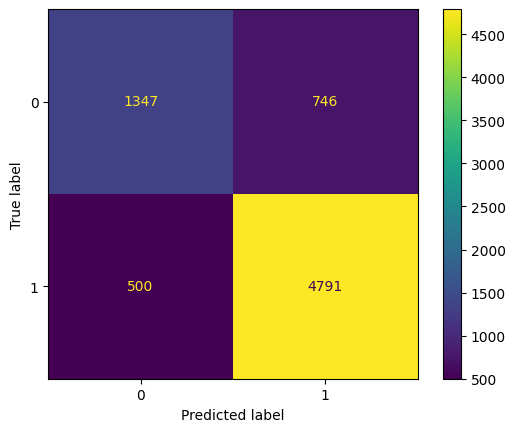

In [25]:
# Import library
import xgboost as xgb

# Train model
model_xgb = xgb.XGBClassifier(random_state=42, n_estimators=200)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

# Metrics and confusion matrix
print(classification_report(y_test, y_pred_xgb))
cm_xgb = confusion_matrix(y_test, y_pred_xgb, labels=model_xgb.classes_)
ConfusionMatrixDisplay(cm_xgb).plot()